# Plotting HYCOM Global Ocean Forecast Data

_Note: this notebook requires python3._

This notebook demonstrates a simple Planet OS API use case using the [HYCOM Global Ocean Forecast dataset](http://data.planetos.com/datasets/hycom_glbu0.08_91.1_global_0.08d:hycom-hybrid-coordinate-ocean-model-global-ocean-forecast?utm_source=github&utm_medium=notebook&utm_campaign=hycom-api-notebook).

API documentation is available at http://docs.planetos.com. If you have questions or comments, join the [Planet OS Slack community](http://slack.planetos.com) to chat with our development team.

For general information on usage of IPython/Jupyter and Matplotlib, please refer to their corresponding documentation. https://ipython.org/ and http://matplotlib.org/

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser
import datetime
from urllib.request import urlopen, Request
import simplejson as json

In [2]:
def extract_reference_time(API_data_loc):
    """Find reference time that corresponds to most complete forecast. Should be the earliest value."""
    reftimes = set()
    for i in API_data_loc['entries']:
        reftimes.update([i['axes']['reftime']])
    reftimes=list(reftimes)
    if len(reftimes)>1:
        reftime = reftimes[0] if dateutil.parser.parse(reftimes[0])<dateutil.parser.parse(reftimes[1]) else reftimes[1]
    else:
        reftime = reftimes[0]
    return reftime

Let's choose a location near Oahu, Hawaii...

In [3]:
location = 'Hawaii Oahu'
if location == 'Est':
    longitude = 24.+45./60
    latitude = 59+25/60.
elif location == 'Au':
    longitude = 149. + 7./60
    latitude = -35.-18./60
elif location == "Hawaii Oahu":
    latitude = 21.205
    longitude = -158.35
elif location == 'Somewhere':
    longitude == -20.
    latitude == 10.

**Important!** You'll need to replace `apikey` below with your actual Planet OS API key, which you'll find on the [Planet OS account settings page](http://data.planetos.com/account/settings/?utm_source=github&utm_medium=notebook&utm_campaign=hycom-api-notebook).

In [4]:
apikey = open('APIKEY').readlines()[0].strip() #'<YOUR API KEY HERE>'
API_url = "http://api.planetos.com/v1/datasets/hycom_glbu0.08_91.2_global_0.08d/point?lon={0}&lat={1}&count=10000&verbose=false&apikey={2}".format(longitude,latitude,apikey)
request = Request(API_url)
response = urlopen(request)
API_data = json.loads(response.read())

Show the available variables and their contexts...

In [5]:
varlist = []
print("{0:<50} {1}".format("Variable","Context"))
print()
for k,v in set([(j,i['context']) for i in API_data['entries'] for j in i['data'].keys()]):
    print("{0:<50} {1}".format(k,v))
    varlist.append(k)

Variable                                           Context

water_temp                                         reference_time_time_depth_lat_lon
water_v                                            reference_time_time_depth_lat_lon
surf_el                                            reference_time_time_lat_lon
salinity                                           reference_time_time_depth_lat_lon
water_u                                            reference_time_time_depth_lat_lon


In [6]:
reftime = extract_reference_time(API_data)

Now let's extract data for all variables and create a different plot for each...

In [7]:
vardict = {}
for i in varlist:
    vardict['time_'+i]=[]
    vardict['data_'+i]=[]
for i in API_data['entries']:
    #print(i['context'])
    reftime = extract_reference_time(API_data)
    for j in i['data']:
        if reftime == i['axes']['reftime']:
            if j != 'surf_el':
                if i['axes']['z'] < 1.:
                    vardict['data_'+j].append(i['data'][j])
                    vardict['time_'+j].append(dateutil.parser.parse(i['axes']['time']))
            else:
                vardict['data_'+j].append(i['data'][j])
                vardict['time_'+j].append(dateutil.parser.parse(i['axes']['time']))

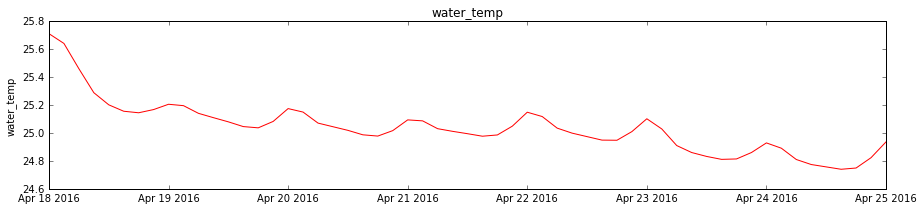

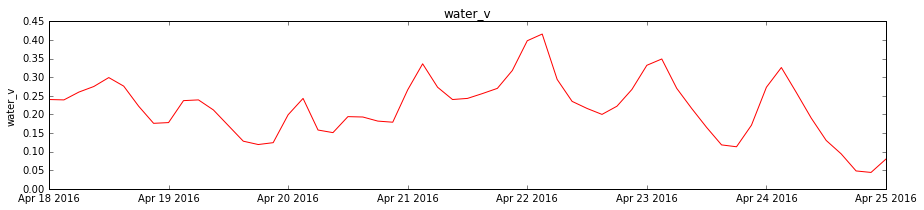

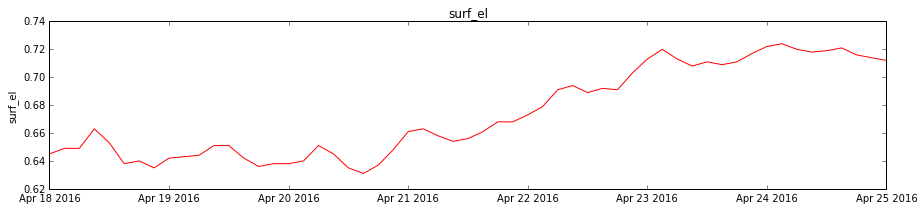

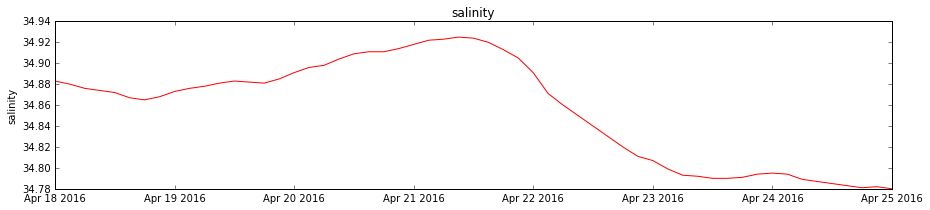

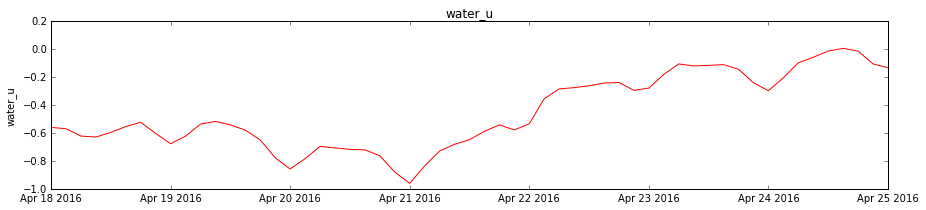

In [8]:
for i in varlist:
    fig = plt.figure(figsize=(15,3))
    plt.title(i)
    ax = fig.add_subplot(111)
    plt.plot(vardict['time_'+i],vardict['data_'+i],color='r')
    ax.set_ylabel(i)

In [9]:
print(API_data['entries'][0]['data'])
print(API_data['entries'][0]['axes'])
print(API_data['entries'][0]['context'])

{'salinity': 34.882999420166016, 'water_u': -0.5600000023841858, 'water_temp': 25.711999893188477, 'water_v': 0.24000000953674316}
{'time': '2016-04-18T00:00:00', 'longitude': -158.32000732421878, 'latitude': 21.200000762939453, 'reftime': '2016-04-18T00:00:00', 'z': 0.0}
reference_time_time_depth_lat_lon
